In [ ]:
'''
Data Info : Sentiment analysis on twitter data, input is string and output is (positive/negative/neutral), 

Models Used: Keras Tokenizer, LSTM, sklearn LabelEncoder

Accuracy : 64%
'''

import pandas as pd
import numpy as np
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.layers import LSTM, Dense, Dropout, Embedding
from keras.models import Sequential, Model
from keras.preprocessing.text import Tokenizer

from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

df = pd.read_csv('/content/drive/My Drive/ML_Data/Sentiment.csv')
df.drop(['id', 'relevant_yn', 'relevant_yn_confidence', 'candidate', 'candidate_confidence', 'sentiment_confidence', 'subject_matter', 'subject_matter_confidence', 'candidate_gold', 'name','relevant_yn_gold','retweet_count', 'sentiment_gold',	'subject_matter_gold', 'tweet_coord', 'tweet_created', 'tweet_id',	'tweet_location',	'user_timezone'], axis=1, inplace=True)


import re
def clean_text(sentence):
  sentence = sentence.split()
  lst = ["RT", "@", "#"]
  sentence = [val for val in sentence if lst[0] not in val]
  sentence = [val for val in sentence if lst[1] not in val]
  sentence = [val for val in sentence if lst[2] not in val]
  sentence = " ".join(sentence)
  return sentence
df['text'] = df['text'].apply(lambda x: clean_text(x))
df.head()

x = df.text
y = df.sentiment

y = y.apply(lambda x: x.lower())

label = LabelEncoder()
y = label.fit_transform(y)

token = Tokenizer()
token.fit_on_texts(x)
total_words = len(token.word_index) + 1

x = token.texts_to_sequences(x)

count = 0
for i in x:
  if len(i) > count:
    count = len(i)

x = pad_sequences(x, maxlen=count, padding='pre')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
y_train = to_categorical(y_train)

model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100, input_length=count))
model.add(LSTM(120))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

callbacks = [EarlyStopping(patience=5), ModelCheckpoint(filepath='/content/drive/My Drive/ML_Data/hello.h5',save_best_only=True)]
model.fit(x_train, y_train, validation_split=0.2, epochs=10, callbacks=callbacks)

y_pred = model.predict_classes(x_test)


from sklearn.metrics import accuracy_score, f1_score, classification_report

print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))
print(f1_score(y_test, y_pred, average='micro'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 29, 100)           1420800   
_________________________________________________________________
lstm_1 (LSTM)                (None, 120)               106080    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 363       
Total params: 1,527,243
Trainable params: 1,527,243
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8876 samples, validate on 2220 samples
Epoch 1/10
8876/8876 [==============================] - 17s 2ms/step - loss: 0.8378 - accuracy: 0.6416 - val_loss: 0.7555 - val_accuracy: 0.6635
Epoch 2/10
8876/8876 [==============================] - 16s 2ms/step - loss: 0.6267 - accuracy: 0.7402 - val_loss: 0.7311 - val_accuracy: 0.6919
Epoch 3/10
8876/8876 [==============================] - 16s 2ms/step - loss: 0.4277 - accuracy: 0.8373 - val_loss: 0.7991 - val_accuracy: 0.6721
Epoch 4/10
8876/8876 [==============================] - 16s 2ms/step - loss: 0.3027 - accuracy: 0.8869 - val_loss: 0.9002 - val_accuracy: 0.6662
Epoch 5/10
8876/8876 [==============================] - 16s 2ms/step - loss: 0.2457 - accuracy: 0.9066 - val_loss: 0.9677 - val_accuracy: 0.6622
Epoch 6/10
8876/8876 [==============================] - 16s 2ms/step - loss: 0.2161 - accuracy: 0.9140 - val_loss: 1.0546 - val_accuracy: 0.6694
Epoch 7/10
8876/8876 [==============================] - 16s 2ms/step - loss: 0.197

In [ ]:
'''
Data Info : Sentiment analysis on twitter data, input is string and output is (positive/negative/neutral), 

Models Used: Lemmatizer, sklearn LabelEncoder(output), keras Tokenizer, MultinomialNB

Accuracy : 52%
'''


lemma = WordNetLemmatizer()

def clean_text(sentence):
  sentence = sentence.split()
  lst = ["RT", "@", "#"]
  sentence = [val for val in sentence if lst[0] not in val]
  sentence = [val for val in sentence if lst[1] not in val]
  sentence = [val for val in sentence if lst[2] not in val]
  sentence = [lemma.lemmatize(x) for x in sentence if x not in stopwords.words('english')]
  sentence = " ".join(sentence)
  return sentence

df['text'] = df['text'].apply(lambda x: clean_text(x))
df.head()

x = df.text
y = df.sentiment

y = y.apply(lambda x: x.lower())

label = LabelEncoder()
y = label.fit_transform(y)

token = Tokenizer()
token.fit_on_texts(x)
total_words = len(token.word_index) + 1

x = token.texts_to_sequences(x)

count = 0
for i in x:
  if len(i) > count:
    count = len(i)

x = pad_sequences(x, maxlen=count, padding='pre')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

naive = MultinomialNB()

naive.fit(x_train, y_train)

y_pred = naive.predict(x_test)

from sklearn.metrics import accuracy_score, f1_score, classification_report

print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))
print(f1_score(y_test, y_pred, average='micro'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
0.5232432432432432
              precision    recall  f1-score   support

           0       0.67      0.66      0.66      1724
           1       0.44      0.33      0.38       834
           2       0.08      0.17      0.11       217

    accuracy                           0.52      2775
   macro avg       0.40      0.39      0.39      2775
weighted avg       0.55      0.52      0.53      2775

0.5232432432432432


In [ ]:
'''
Data Info : Sentiment analysis on twitter data, input is string and output is (positive/negative/neutral), 

Models Used: Lemmatizer, sklearn LabelEncoder, TfidfVectorizer, MultinomialNB, stopwords removed
              no punctuation removed.

Accuracy : 63.85%
'''

lemma = WordNetLemmatizer()

def clean_text(sentence):
  sentence = sentence.split()
  lst = ["RT", "@", "#"]
  sentence = [val for val in sentence if lst[0] not in val]
  sentence = [val for val in sentence if lst[1] not in val]
  sentence = [val for val in sentence if lst[2] not in val]
  sentence = [lemma.lemmatize(x) for x in sentence if x not in stopwords.words('english')]
  sentence = " ".join(sentence)
  return sentence

df['text'] = df['text'].apply(lambda x: clean_text(x))
df.head()

x = df.text
y = df.sentiment

y = y.apply(lambda x: x.lower())

label = LabelEncoder()
y = label.fit_transform(y)

token = Tokenizer()
token.fit_on_texts(x)
total_words = len(token.word_index) + 1

word_tfidf = TfidfVectorizer(max_features = 14000)
x = word_tfidf.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

naive = MultinomialNB()

naive.fit(x_train, y_train)

y_pred = naive.predict(x_test)

from sklearn.metrics import accuracy_score, f1_score, classification_report

print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))
print(f1_score(y_test, y_pred, average='micro'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
0.6385585585585586
              precision    recall  f1-score   support

           0       0.98      0.63      0.77      2590
           1       0.10      0.70      0.18        97
           2       0.15      0.74      0.25        88

    accuracy                           0.64      2775
   macro avg       0.41      0.69      0.40      2775
weighted avg       0.92      0.64      0.73      2775

0.6385585585585586


In [ ]:
'''
Data Info : Sentiment analysis on twitter data, input is string and output is (positive/negative/neutral), 

Models Used: sklearn LabelEncoder, TfidfVectorizer, MultinomialNB, punctuation removed, no stopwords removed, 
             no lemmatier
Accuracy : 63.71%
'''


def clean_text(sentence):
  val = str.maketrans('', '', string.punctuation)
  sentence = [w.translate(val) for w in sentence]
  "".join(sentence)
  return sentence


df['text'].apply(lambda x : clean_text(x))

x = df['text']
y = df['sentiment']

word_tfidf = TfidfVectorizer()

x = word_tfidf.fit_transform(x)

label = LabelEncoder()
y = label.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()


mnb.fit(x_train, y_train)

y_pred = mnb.predict(x_test)

from sklearn.metrics import f1_score, classification_report, accuracy_score

print(accuracy_score(y_pred, y_test))
print(f1_score(y_pred, y_test, average='micro'))
print(classification_report(y_pred, y_test))

0.6371171171171172
0.6371171171171172
              precision    recall  f1-score   support

           0       0.99      0.63      0.77      2644
           1       0.08      0.62      0.14        82
           2       0.09      0.82      0.16        49

    accuracy                           0.64      2775
   macro avg       0.39      0.69      0.36      2775
weighted avg       0.94      0.64      0.74      2775



In [ ]:
'''
Data Info : Sentiment analysis on twitter data, input is string and output is (positive/negative/neutral), 

Models Used: sklearn LabelEncoder, TfidfVectorizer, MultinomialNB, punctuation removed, Lemmatizer, no stopwords removed

Accuracy : 64.68%
'''


lemma = WordNetLemmatizer()

def clean_text(sentence):
  val = str.maketrans('', '', string.punctuation)
  sentence = [w.translate(val) for w in sentence]
  "".join(sentence)
  sentence = [lemma.lemmatize(w) for w in sentence]
  " ".join(sentence)
  return sentence


df['text'].apply(lambda x : clean_text(x))

x = df['text']
y = df['sentiment']

word_tfidf = TfidfVectorizer()

x = word_tfidf.fit_transform(x)

label = LabelEncoder()
y = label.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()


mnb.fit(x_train, y_train)

y_pred = mnb.predict(x_test)

from sklearn.metrics import f1_score, classification_report, accuracy_score

print(accuracy_score(y_pred, y_test))
print(f1_score(y_pred, y_test, average='micro'))
print(classification_report(y_pred, y_test))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
0.6468468468468469
0.6468468468468469
              precision    recall  f1-score   support

           0       0.99      0.64      0.78      2647
           1       0.09      0.76      0.16        74
           2       0.11      0.93      0.20        54

    accuracy                           0.65      2775
   macro avg       0.40      0.77      0.38      2775
weighted avg       0.95      0.65      0.75      2775



In [ ]:
'''
Data Info : Sentiment analysis on twitter data, input is string and output is (positive/negative/neutral), 

Models Used: sklearn LabelEncoder, TfidfVectorizer, MultinomialNB, punctuation removed, Lemmatizer, stopwords removed

Accuracy : 64.82%
'''

import pandas as pd
import numpy as np
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

df = pd.read_csv('/content/drive/My Drive/ML_Data/Sentiment.csv')
df.drop(['id', 'relevant_yn', 'relevant_yn_confidence', 'candidate', 'candidate_confidence', 'sentiment_confidence', 'subject_matter', 'subject_matter_confidence', 'candidate_gold', 'name','relevant_yn_gold','retweet_count', 'sentiment_gold',	'subject_matter_gold', 'tweet_coord', 'tweet_created', 'tweet_id',	'tweet_location',	'user_timezone'], axis=1, inplace=True)

df.head()

lemma = WordNetLemmatizer()

def clean_text(sentence):
  val = str.maketrans('', '', string.punctuation)
  sentence = [w.translate(val) for w in sentence]
  sentence = "".join(sentence)
  sentence = [lemma.lemmatize(w) for w in sentence.split(" ") if w not in stopwords.words('english')]
  " ".join(sentence)
  return sentence

df['text'].apply(lambda x : clean_text(x))

x = df['text']
y = df['sentiment']

word_tfidf = TfidfVectorizer()

x = word_tfidf.fit_transform(x)

label = LabelEncoder()
y = label.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb.fit(x_train, y_train)

y_pred = mnb.predict(x_test)

from sklearn.metrics import f1_score, classification_report, accuracy_score

print(accuracy_score(y_pred, y_test))
print(f1_score(y_pred, y_test, average='micro'))
print(classification_report(y_pred, y_test))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Using TensorFlow backend.


0.6493693693693694
0.6493693693693694
              precision    recall  f1-score   support

           0       0.99      0.64      0.78      2647
           1       0.10      0.78      0.17        74
           2       0.10      0.85      0.18        54

    accuracy                           0.65      2775
   macro avg       0.40      0.76      0.38      2775
weighted avg       0.95      0.65      0.75      2775



In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn import model_selection, naive_bayes, svm, metrics, preprocessing, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import decomposition, ensemble

from keras.preprocessing.sequence import pad_sequences


df = pd.read_csv('/content/drive/My Drive/ML_Data/Sentiment.csv')
df.drop(['id', 'relevant_yn', 'relevant_yn_confidence', 'candidate', 'candidate_confidence', 'sentiment_confidence', 'subject_matter', 'subject_matter_confidence', 'candidate_gold', 'name','relevant_yn_gold','retweet_count', 'sentiment_gold',	'subject_matter_gold', 'tweet_coord', 'tweet_created', 'tweet_id',	'tweet_location',	'user_timezone'], axis=1, inplace=True)



def clean_data(sentence):
  sentence = [w for w in sentence.split(" ") if "RT" not in w]
  sentence = [w for w in sentence if ":" not in w]
  sentence = [w for w in sentence if "#" not in w]
  sentence = [w for w in sentence if "@" not in w]
  sentence = " ".join(sentence)
  return sentence

df["text"] = df["text"].apply(lambda x: clean_data(x))

x = df.text
y = df.sentiment

label = preprocessing.LabelEncoder()

y = label.fit_transform(y)


Using TensorFlow backend.


In [ ]:
# Encoding the input text

count_label = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')

x_count = count_label.fit_transform(x)


tfidf_word_label = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)

x_tfidf_word = tfidf_word_label.fit_transform(x)


tfidf_ngram_word_label = TfidfVectorizer(analyzer='word', ngram_range=(2, 3), token_pattern=r'\w{1,}', max_features=5000)

x_ngram_tfidf_word = tfidf_ngram_word_label.fit_transform(x)


tfidf_char_label = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', max_features=5000)

x_tfidf_char = tfidf_char_label.fit_transform(x)


tfidf_ngram_char_label = TfidfVectorizer(analyzer='char', ngram_range=(2, 3), token_pattern=r'\w{1,}', max_features=5000)

x_ngram_tfidf_char = tfidf_ngram_char_label.fit_transform(x)


In [ ]:
x_train_count, x_test_count, y_train, y_test = train_test_split(x_count, y, test_size=0.2, random_state=42)
x_train_tfidf_word, x_test_tfidf_word, y_train, y_test = train_test_split(x_tfidf_word, y, test_size=0.2, random_state=42)
x_train_ngram_tfidf_word, x_test_ngram_tfidf_word, y_train, y_test = train_test_split(x_ngram_tfidf_word, y, test_size=0.2, random_state=42)
x_train_tfidf_char,  x_test_tfidf_char, y_train, y_test = train_test_split(x_tfidf_char, y, test_size=0.2, random_state=42)
x_train_ngram_tfidf_char,  x_test_ngram_tfidf_char, y_train, y_test = train_test_split(x_ngram_tfidf_char, y, test_size=0.2, random_state=42)

In [ ]:
def model_training(model, x_train, y_train, x_test, y_test):

  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = metrics.accuracy_score(y_pred, y_test)

  return accuracy

In [ ]:
accuracyAnalysis = {}
accuracy = model_training(naive_bayes.MultinomialNB(), x_train_count, y_train, x_test_count, y_test)
print("NB countVectorizer: ", accuracy)
accuracyAnalysis["NB countVectorizer"] = accuracy

accuracy = model_training(naive_bayes.MultinomialNB(), x_train_tfidf_word, y_train, x_test_tfidf_word, y_test)
print("NB Tfidf word: ", accuracy)
accuracyAnalysis["NB Tfidf word"] = accuracy

accuracy = model_training(naive_bayes.MultinomialNB(), x_train_ngram_tfidf_word, y_train, x_test_ngram_tfidf_word, y_test)
print("NB ngram countVectorizer: ", accuracy)
accuracyAnalysis["NB ngram countVectorizer"] = accuracy

accuracy = model_training(naive_bayes.MultinomialNB(), x_train_tfidf_char, y_train, x_test_tfidf_char, y_test)
print("NB Tfidf char: ", accuracy)
accuracyAnalysis["NB Tfidf char"] = accuracy

accuracy = model_training(naive_bayes.MultinomialNB(), x_train_ngram_tfidf_char, y_train, x_test_ngram_tfidf_char, y_test)
print("NB ngram Tfidf char: ", accuracy)
accuracyAnalysis["NB ngram Tfidf char"] = accuracy

NB countVectorizer:  0.6396396396396397
NB Tfidf word:  0.6590990990990991
NB ngram countVectorizer:  0.652972972972973
NB Tfidf char:  0.623063063063063
NB ngram Tfidf char:  0.6443243243243243


In [ ]:
accuracy = model_training(svm.SVC(), x_train_count, y_train, x_test_count, y_test)
print("SVM countVectorizer: ", accuracy)
accuracyAnalysis["SVM countVectorizer"] = accuracy

accuracy = model_training(svm.SVC(), x_train_tfidf_word, y_train, x_test_tfidf_word, y_test)
print("SVM Tfidf word: ", accuracy)
accuracyAnalysis["SVM Tfidf word"] = accuracy

accuracy = model_training(svm.SVC(), x_train_ngram_tfidf_word, y_train, x_test_ngram_tfidf_word, y_test)
print("SVM ngram countVectorizer: ", accuracy)
accuracyAnalysis["SVM ngram countVectorizer"] = accuracy

accuracy = model_training(svm.SVC(), x_train_tfidf_char, y_train, x_test_tfidf_char, y_test)
print("SVM Tfidf char: ", accuracy)
accuracyAnalysis["SVM Tfidf char"] = accuracy

accuracy = model_training(svm.SVC(), x_train_ngram_tfidf_char, y_train, x_test_ngram_tfidf_char, y_test)
print("SVM ngram Tfidf char: ", accuracy)
accuracyAnalysis["SVM ngram Tfidf char"] = accuracy

SVM countVectorizer:  0.6785585585585585
SVM Tfidf word:  0.6958558558558559
SVM ngram countVectorizer:  0.6666666666666666
SVM Tfidf char:  0.6374774774774775
SVM ngram Tfidf char:  0.6796396396396397


In [ ]:
accuracy = model_training(linear_model.LogisticRegression(), x_train_count, y_train, x_test_count, y_test)
print("LR countVectorizer: ", accuracy)
accuracyAnalysis["LR countVectorizer"] = accuracy

accuracy = model_training(linear_model.LogisticRegression(), x_train_tfidf_word, y_train, x_test_tfidf_word, y_test)
print("LR Tfidf word: ", accuracy)
accuracyAnalysis["LR Tfidf word"] = accuracy

accuracy = model_training(linear_model.LogisticRegression(), x_train_ngram_tfidf_word, y_train, x_test_ngram_tfidf_word, y_test)
print("LR ngram countVectorizer: ", accuracy)
accuracyAnalysis["LR ngram countVectorizer"] = accuracy

accuracy = model_training(linear_model.LogisticRegression(), x_train_tfidf_char, y_train, x_test_tfidf_char, y_test)
print("LR Tfidf char: ", accuracy)
accuracyAnalysis["LR Tfidf char"] = accuracy

accuracy = model_training(linear_model.LogisticRegression(), x_train_ngram_tfidf_char, y_train, x_test_ngram_tfidf_char, y_test)
print("LR ngram Tfidf char: ", accuracy)
accuracyAnalysis["LR ngram Tfidf char"] = accuracy

LR countVectorizer:  0.6753153153153153
LR Tfidf word:  0.6861261261261261
LR ngram countVectorizer:  0.6554954954954955
LR Tfidf char:  0.6295495495495496
LR ngram Tfidf char:  0.6763963963963964


In [ ]:
accuracy = model_training(ensemble.RandomForestClassifier(), x_train_count, y_train, x_test_count, y_test)
print("RF countVectorizer: ", accuracy)
accuracyAnalysis["RF countVectorizer"] = accuracy

accuracy = model_training(ensemble.RandomForestClassifier(), x_train_tfidf_word, y_train, x_test_tfidf_word, y_test)
print("RF Tfidf word: ", accuracy)
accuracyAnalysis["RF Tfidf word"] = accuracy

accuracy = model_training(ensemble.RandomForestClassifier(), x_train_ngram_tfidf_word, y_train, x_test_ngram_tfidf_word, y_test)
print("RF ngram countVectorizer: ", accuracy)
accuracyAnalysis["RF ngram countVectorizer"] = accuracy

accuracy = model_training(ensemble.RandomForestClassifier(), x_train_tfidf_char, y_train, x_test_tfidf_char, y_test)
print("RF Tfidf char: ", accuracy)
accuracyAnalysis["RF Tfidf char"] = accuracy

accuracy = model_training(ensemble.RandomForestClassifier(), x_train_ngram_tfidf_char, y_train, x_test_ngram_tfidf_char, y_test)
print("RF ngram Tfidf char: ", accuracy)
accuracyAnalysis["RF ngram Tfidf char"] = accuracy

RF countVectorizer:  0.6781981981981982
RF Tfidf word:  0.6763963963963964
RF ngram countVectorizer:  0.6482882882882883
RF Tfidf char:  0.6605405405405406
RF ngram Tfidf char:  0.6717117117117117


In [ ]:
accuracy = model_training(ensemble.AdaBoostClassifier(), x_train_count, y_train, x_test_count, y_test)
print("AB countVectorizer: ", accuracy)
accuracyAnalysis["AB countVectorizer"] = accuracy

accuracy = model_training(ensemble.AdaBoostClassifier(), x_train_tfidf_word, y_train, x_test_tfidf_word, y_test)
print("AB Tfidf word: ", accuracy)
accuracyAnalysis["AB Tfidf word"] = accuracy

accuracy = model_training(ensemble.AdaBoostClassifier(), x_train_ngram_tfidf_word, y_train, x_test_ngram_tfidf_word, y_test)
print("AB ngram countVectorizer: ", accuracy)
accuracyAnalysis["AB ngram countVectorizer"] = accuracy

accuracy = model_training(ensemble.AdaBoostClassifier(), x_train_tfidf_char, y_train, x_test_tfidf_char, y_test)
print("AB Tfidf char: ", accuracy)
accuracyAnalysis["AB Tfidf char"] = accuracy

accuracy = model_training(ensemble.AdaBoostClassifier(), x_train_ngram_tfidf_char, y_train, x_test_ngram_tfidf_char, y_test)
print("AB ngram Tfidf char: ", accuracy)
accuracyAnalysis["AB ngram Tfidf char"] = accuracy

AB countVectorizer:  0.649009009009009
AB Tfidf word:  0.6418018018018018
AB ngram countVectorizer:  0.6295495495495496
AB Tfidf char:  0.6335135135135135
AB ngram Tfidf char:  0.6335135135135135


In [ ]:
metrics = sorted(accuracyAnalysis.items(), key=lambda x: x[1], reverse=True)
metrics

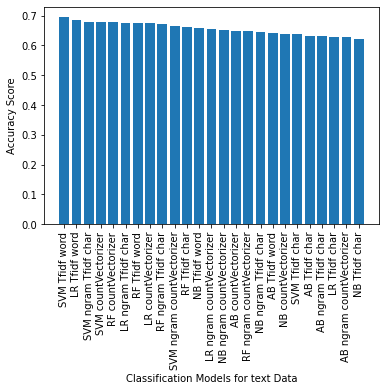

In [ ]:
import matplotlib.pyplot as plt
!matplotlib inline

x_metrics = []
y_metrics = []

for i in metrics:
  x_metrics.append(i[0])
  y_metrics.append(i[1])


plt.xlabel("Classification Models for text Data")
plt.ylabel("Accuracy Score")
# plt.plot(x_metrics, y_metrics)
plt.bar(x_metrics, y_metrics)
plt.xticks(x_metrics, rotation='vertical')
plt.show()